<a href="https://colab.research.google.com/github/k-wakamatsu-tms/CSV2Report/blob/main/CSV2Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSVからレポートを作成する

## 注意

途中に動的にコードを生成する箇所がありますが、愚直に実装した場合、環境変数を読み取る、任意の場所に送信するなど非常に危険なコードが容易に生成できるので注意してください。

In [ ]:
openai_key = "" #@param {type:"string"}

In [ ]:
# https://www.opendata.metro.tokyo.lg.jp/shijyou/2022/estimate_quantity_fish.csv
# 上記からダウンロードしてください
from google.colab import files
uploaded = files.upload()
csv_file_name = list(uploaded.keys())[0]
csv_file_path = '/content/' + csv_file_name
print(csv_file_name)
print(csv_file_path)

Saving estimate_quantity_fish.csv to estimate_quantity_fish (1).csv
estimate_quantity_fish.csv
/content/estimate_quantity_fish.csv


In [ ]:
!pip install japanize-matplotlib
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 KB 4.0 MB/s eta 0:00:00


In [ ]:
import csv
from typing import List


def get_csv_head(file_path: str) -> str:
    """
    指定されたCSVファイルの先頭10行を取得して文字列として返す関数。

    Args:
        file_path (str): CSVファイルのパス。

    Returns:
        str: CSVファイルの先頭10行をカンマ区切りで連結した文字列。
    """
    text = ''

    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for i, row in enumerate(reader):
            if i < 10:
                text += ','.join(row) + '\n'
            else:
                break

    return text

In [ ]:
import openai
openai.api_key = openai_key
def completion(new_message_text:str, settings_text:str = '', past_messages:list = []):
    """
    この関数は、OpenAIのChatGPT API(gpt-3.5-turbo)を使用して、新しいメッセージテキスト、オプションの設定テキスト、
    過去のメッセージのリストを入力として受け取り、レスポンスメッセージを生成するために使用されます。

    Args:
    new_message_text (str): モデルがレスポンスメッセージを生成するために使用する新しいメッセージテキスト。
    settings_text (str, optional): 過去のメッセージリストにシステムメッセージとして追加されるオプションの設定テキスト。デフォルトは''です。
    past_messages (list, optional): モデルがレスポンスメッセージを生成するために使用するオプションの過去のメッセージのリスト。デフォルトは[]です。

    Returns:
    tuple: レスポンスメッセージテキストと、新しいメッセージとレスポンスメッセージを追加した過去のメッセージリストを含むタプル。
    """
    if len(past_messages) == 0 and len(settings_text) != 0:
        system = {"role": "system", "content": settings_text}
        past_messages.append(system)
    new_message = {"role": "user", "content": new_message_text}
    past_messages.append(new_message)

    result = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=past_messages,
        max_tokens=1024
    )
    response_message = {"role": "assistant", "content": result.choices[0].message.content}
    past_messages.append(response_message)
    response_message_text = result.choices[0].message.content
    return response_message_text, past_messages

In [ ]:
csv_head = get_csv_head("data.csv")

In [ ]:
# CSVの要約
template_summarize = f"""{csv_head}

上記データについてmarkdownを用いてブログ記事風にまとめてください。"""
summarize_text, past = completion(template_summarize, '', [])

In [ ]:
from IPython.display import display, Markdown, Latex

display(Markdown("## 概要\n" + summarize_text))

## 概要


最新の水産市場データから、2022年4月1日時点の豊洲市場の鮮魚販売予定数量をご紹介いたします。

豊洲市場において、以下の品目が相対販売予定数量として取り扱われています。

- あじ：19.5t
- さば：21.7t
- いわし：13.5t
- するめいか：10.5t
- かつお：14.6t
- さんま：2.0t
- かれい：7.6t
- きんめだい：7.4t
- はまち：22.5t

このデータから、豊洲市場ではさばが最も多く予定されており、続いてははまち、あじとなっています。また、さんまの販売数量が比較的少ないことが分かります。

これらの販売数量は卸売りの予定数であり、実際の販売数量は変動する可能性があります。しかしながら、豊洲市場の市況や需要の動向を知る上で、参考になる情報と言えます。

In [ ]:
purpose, past = completion("どのような目的で活用できますか？", '', past)

In [ ]:
display(Markdown("## データの活用\n" + purpose))

## データの活用
この水産市場データは、水産業界に従事している企業や個人にとって、以下のような活用が可能です。

1. 品目別需要予測の参考情報：市場に出回る鮮魚の販売数量を知ることで、需要予測に役立てることができます。例えば、ある魚種の需要が多いと予測される場合、生産量を増やして販売することで、販売収益の向上が期待できます。

2. 市況の把握：水産市場全体の市況を知ることで、特定の魚種の価格変動や需要動向を推測することができます。この情報を元に、仕入れ価格を調整するなど、業務戦略の決定に役立てることができます。

3. 業界トレンドの把握：水産市場データを比較することで、時間的変化や地域差のある業界トレンドを把握することができます。これにより、業界全体の方向性や今後の市場の変化を予測し、それに対応する戦略を策定することができます。

以上のように、水産市場データは、水産業界に従事している企業や個人にとって、業務戦略の決定や需要予測に役立つ貴重な情報源となっています。

In [ ]:
problem, past = completion("データからわかる課題を教えて下さい。", '', past)

In [ ]:
display(Markdown("## 課題\n" + problem))

## 課題
この水産市場データからは、以下のような課題が浮かび上がります。

1. 魚種による需要の偏り：このデータからは、需要の高い魚種と低い魚種が明確に現れています。需要の高い魚種に販売を集中することで、多くの販売収益を得ることができますが、需要の低い魚種については在庫の問題や廃棄ロスの課題があります。

2. 発注量と在庫管理の課題：卸売りの予定数と、実際の販売数量が異なる場合、在庫管理の課題が発生します。発注量を滞りなく行い、在庫の適切な管理をすることで、効率的な業務運営に繋がります。

3. 水産業界全体の市況の課題：水産業界全体の市況が不安定である場合、需要や価格の変動が大きくなり、業者は逐一市場情報を収集し、臨機応変な対応が求められます。市況を把握する情報収集の重要性が高まっています。

なお、このデータはあくまで予定数量であり、実際の販売数量が異なる可能性があることを忘れてはなりません。データの信頼性を高め、業務戦略を的確に策定するためにも、正確な情報収集が求められます。

In [ ]:
summary, past = completion("まとめとしていい感じに書いてください。", '', past)

In [ ]:
display(Markdown("## まとめ\n" + summary))

## まとめ
今回ご紹介した水産市場データは、豊洲市場において2022年4月1日時点で予定されている鮮魚販売予定数量を示しています。これらの販売数量は業界の需要予測や市況把握、トレンド分析などに役立てることができます。

しかしながら、このデータからは、魚種別需要の偏り、発注量と在庫管理の課題、水産業界全体の市況の課題が浮かび上がっています。これらの課題に対応するためには、正確な情報収集や市場動向に基づいた戦略の策定が求められます。

水産業界に従事する企業や個人は、このようなデータを活用しつつ、業務戦略の最適化に取り組んでいくことが重要です。正確な情報収集と分析により、業界全体の発展とともに、自身の事業の発展に繋げていくことを目指していただきたいです。

In [ ]:
# グラフ化
template_graph = f"""{csv_head}

上記データの可視化処理を3パターン、matplotlibを使って行ってください
なお、csvのファイルパスは {csv_file_path} です。
すべて実行可能なコードとして出力して必要な場合は#でコメントとしてください"""
graph_text, past = completion(template_graph, '', [])

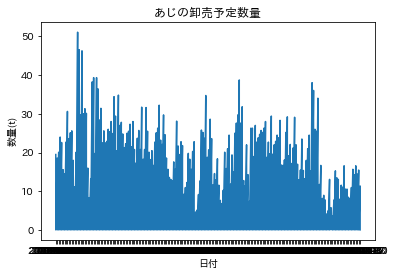

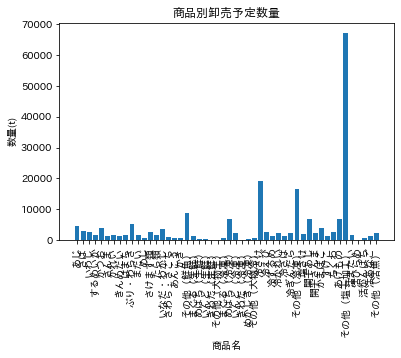

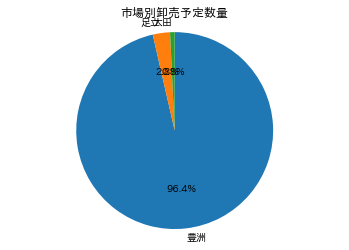

In [ ]:
graph_eval_text = graph_text.replace('import matplotlib.pyplot as plt', 'import matplotlib.pyplot as plt\nimport japanize_matplotlib')
try:
    exec(graph_eval_text)
except:
    print('error')